Para el presente trabajo elegí un dataset que contiene todos los datos de los jugadores de las versiones de FIFA del año 2015  al 2021. En cuanto a los datos que demuestra dicho dataset, se encuentran muchos valores que EA Sports les asigna, dependiendo del rendimiento del futbolista en la vida real. Sin embargo, estos valores se van actualizando juego a juego. Contenido que podemos ver:
•	Todos los jugadores disponibles en FIFA 15, 16, 17, 18, 19, 20 y21
•	Muchos atributos
•	Posiciones de los jugadores, con el rol en el club y en la selección
•	Atributos del jugador con estadísticas como Ataque, Habilidades, Defensa, Mentalidad, etc.
•	Datos personales del jugador como nacionalidad, club, fecha de nacimiento, salario, etc.

Este trabajo final cuenta con:
Analisis preliminar por medio de visualizacion de datos
Limpieza y preparacion de datos
Retiro de columnas de poca importancia
Creacion del modelo ML
Entrenamiento del modelo
Zona de evaluacion de la prediccion
Zona de metricas y resultados finales (Regresion logistica)

https://www.kaggle.com/datasets/stefanoleone992/fifa-21-complete-player-dataset?select=players_21.csv


In [1]:

from matplotlib import rcParams
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Copy of Career Mode player datasets - FIFA 15-21.csv",sep=";", encoding='cp1252')

In [3]:
df.head()

,fifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,33,24/6/1987,170,72,Argentina,FC Barcelona,Spain Primera Division,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,5/2/1985,187,83,Portugal,Juventus,Italian Serie A,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,J. Oblak,Jan Oblak,27,7/1/1993,188,87,Slovenia,Atlético Madrid,Spain Primera Division,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,R. Lewandowski,Robert Lewandowski,31,21/8/1988,184,80,Poland,FC Bayern München,German 1. Bundesliga,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,Neymar Jr,Neymar da Silva Santos Júnior,28,5/2/1992,175,68,Brazil,Paris Saint-Germain,French Ligue 1,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [4]:
#Hago un panorama general para explorar un poco el dataset(cantidad de filas y columnas, nombre de las columnas, tipo de datos,

print(f'SHAPE:\n\n{df.shape}')
print(f'------------------\n')
print(f'COLUMNS:\n\n{df.columns}')
print(f'------------------\n')
print(f'COLUMNS DATA TYPE:\n\n{df.dtypes}')
print(f'------------------\n')
print(f'DESCRIBE:\n\n{df.describe().round(2)}')
print(f'------------------\n')
print(f'COUNT:\n\n{df.count()}')
print(f'------------------\n')
print(f'2 ROW SAMPLE:\n\n{df.sample(2)}')
print(f'------------------\n')

SHAPE:

(18944, 105)
------------------

COLUMNS:

Index(['fifa_id', 'short_name', 'long_name', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality', 'club_name', 'league_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=105)
------------------

COLUMNS DATA TYPE:

fifa_id        int64
short_name    object
long_name     object
age            int64
dob           object
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 105, dtype: object
------------------

DESCRIBE:

         fifa_id       age  height_cm  weight_kg  league_rank   overall  \
count   18944.00  18944.00   18944.00   18944.00     18719.00  18944.00   
mean   226242.40     25.23     181.19      75.02         1.36     65.68   
std     27171.09      4.70       6.83       7.06         0.74      7.00   
min        41.00     16.00     155.00      50.00         1.00    

In [5]:
fifa = df

In [6]:
#Cambio el formato de la columna dob ya que es una fecha
fifa["dob"]= pd.to_datetime(fifa["dob"])
fifa

,fifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-05-02,187,83,Portugal,Juventus,Italian Serie A,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,J. Oblak,Jan Oblak,27,1993-07-01,188,87,Slovenia,Atlético Madrid,Spain Primera Division,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-05-02,175,68,Brazil,Paris Saint-Germain,French Ligue 1,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,K. Angulo,Kevin Angulo,24,1996-04-13,176,73,Colombia,América de Cali,Colombian Liga Postobón,...,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2
18940,257710,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,...,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2
18941,250989,Wang Zhenghao,???,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,Chinese Super League,...,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,257697,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2


In [7]:
fifa.isnull().sum()

fifa_id       0
short_name    0
long_name     0
age           0
dob           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 105, dtype: int64

In [8]:
fifa.dropna()

,fifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


In [9]:
#Borro la columna defending_marking ya que tiene todos valores nulos
fifa = fifa.drop(columns = ['defending_marking'])
fifa.head()

,fifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-05-02,187,83,Portugal,Juventus,Italian Serie A,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,J. Oblak,Jan Oblak,27,1993-07-01,188,87,Slovenia,Atlético Madrid,Spain Primera Division,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-05-02,175,68,Brazil,Paris Saint-Germain,French Ligue 1,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3


In [10]:
#Renombro la columna dob para que sea mas entendible
fifa21 = fifa.rename(columns = {"dob": "born_on"})
fifa21

,fifa_id,short_name,long_name,age,born_on,height_cm,weight_kg,nationality,club_name,league_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-05-02,187,83,Portugal,Juventus,Italian Serie A,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,J. Oblak,Jan Oblak,27,1993-07-01,188,87,Slovenia,Atlético Madrid,Spain Primera Division,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,German 1. Bundesliga,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-05-02,175,68,Brazil,Paris Saint-Germain,French Ligue 1,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,K. Angulo,Kevin Angulo,24,1996-04-13,176,73,Colombia,América de Cali,Colombian Liga Postobón,...,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2
18940,257710,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,Chinese Super League,...,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2
18941,250989,Wang Zhenghao,???,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,Chinese Super League,...,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,257697,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,Chinese Super League,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2


In [11]:
#Edades de los jugadores
Edades = fifa21["age"].unique().tolist()
Edades

[33,
 35,
 27,
 31,
 28,
 29,
 21,
 32,
 34,
 26,
 25,
 30,
 20,
 22,
 24,
 23,
 19,
 38,
 42,
 36,
 37,
 18,
 17,
 39,
 40,
 41,
 16,
 43,
 53]

Mean Age of All Players: 25.22582347972973


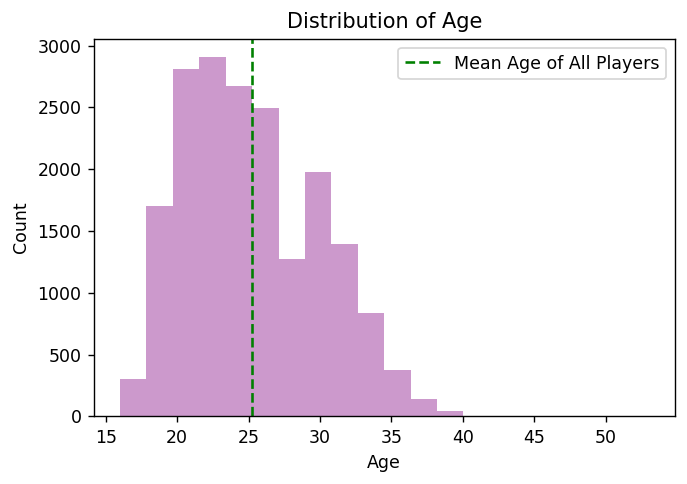

In [12]:
#En el histograma vemos la distribución de edad de los jugadores y tenemos una edad promedio de 25.22

plt.figure(dpi=125)
sns.distplot(a=fifa21['age'],kde=False,bins=20,color='purple')
plt.axvline(x=np.mean(fifa21['age']),c='green',ls='--',label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
print('Mean Age of All Players:',np.mean(fifa['age']))
plt.show()

In [13]:
#cuantos jugadores hay por pais?
fifa21['nationality'].value_counts()

England             1685
Germany             1189
Spain               1072
France               984
Argentina            936
                    ... 
Saint Lucia            1
Papua New Guinea       1
Aruba                  1
Chad                   1
Nicaragua              1
Name: nationality, Length: 162, dtype: int64

<AxesSubplot:>

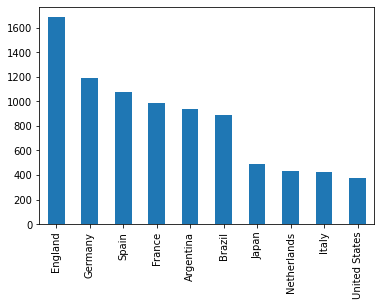

In [14]:
#Filtro algunos paises
algunos_paises = fifa21['nationality'].value_counts()[0:10]
algunos_paises
algunos_paises.plot.bar()


Busco outliers/valores atipicos. Un outlier es una observación anormal y extrema en una muestra estadística o serie temporal de datos que puede afectar potencialmente a la estimación de los parámetros del mismo

In [15]:
players_overall = fifa21[["short_name", "overall"]]
players_overall.head()
players_overall.nlargest(3,"overall")


,short_name,overall
0,L. Messi,93
1,Cristiano Ronaldo,92
2,J. Oblak,91


In [16]:
#Acá considero que hay un outlier en cuanto al salario que gana Messi ya que este es superior al resto
players_wage = fifa21[["short_name", "wage_eur"]]
players_wage.head()
players_wage.nlargest(3,"wage_eur")

,short_name,wage_eur
0,L. Messi,560000
5,K. De Bruyne,370000
15,K. Benzema,350000


<AxesSubplot:xlabel='short_name', ylabel='wage_eur'>

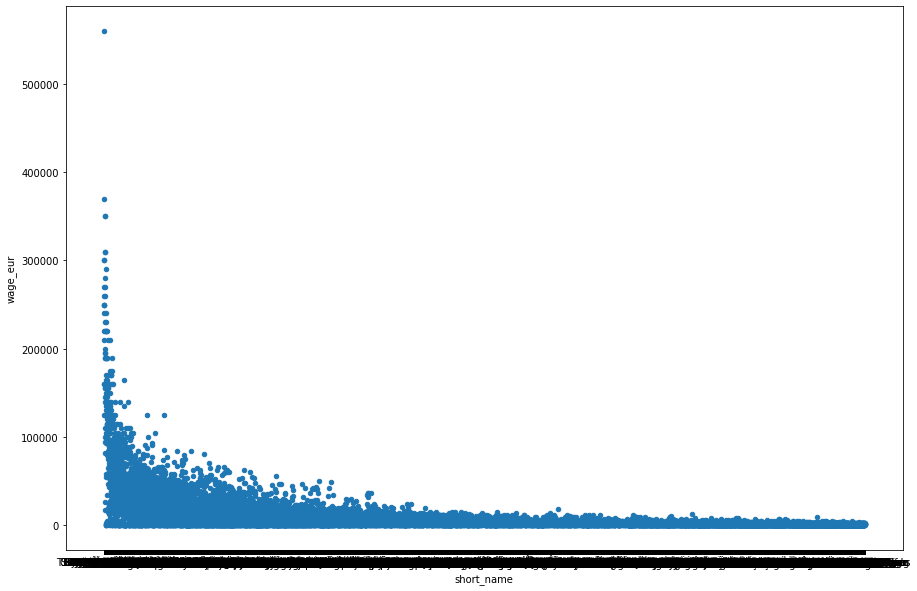

In [17]:
#lo vemos mejor en un grafico
players_wage.plot(x ='short_name', y='wage_eur', kind = 'scatter', figsize=(15, 10))

In [18]:
players_value = fifa21[["short_name", "value_eur"]]
players_value.head()
players_value.nlargest(3,"value_eur")

,short_name,value_eur
6,K. Mbappé,105500000
4,Neymar Jr,90000000
5,K. De Bruyne,87000000


In [19]:
#filtro las alturas de los jugadores
players_heights = fifa21[["short_name", "height_cm"]]
players_heights.head()

,short_name,height_cm
0,L. Messi,170
1,Cristiano Ronaldo,187
2,J. Oblak,188
3,R. Lewandowski,184
4,Neymar Jr,175


In [20]:
#Top 10 Jugadores más altos
players_heights.nlargest(10, "height_cm")

,short_name,height_cm
10171,T. Holý,206
4285,C. Pantilimon,203
11364,A. Ba,203
6582,V. Milinkovi?-Savi?,202
7337,K. Scherpen,202
11569,S. Maierhofer,202
18199,D. Thiam,202
1361,F. Forster,201
1992,L. Kalini?,201
3272,P. Onuachu,201


<AxesSubplot:xlabel='short_name', ylabel='height_cm'>

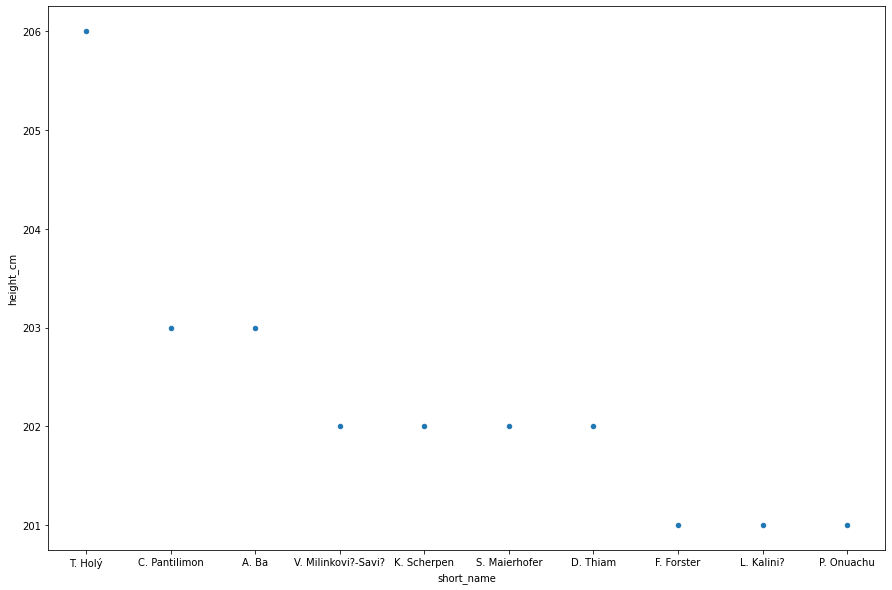

In [21]:
#Jugadores más altos en un gráfico, se puede ver perfectamente un outlier arriba a la izquierda del jugador T Holy
Jugadores_mas_altos = players_heights.nlargest(10, "height_cm")
Jugadores_mas_altos.plot(x ='short_name', y='height_cm', kind = 'scatter', figsize=(15, 10))

In [22]:
#disparo de los jugadores
player_shooting = fifa21[['short_name', 'shooting']]

In [23]:
player_shooting.sort_values(by = ['shooting'], ascending = False).head()

,short_name,shooting
1,Cristiano Ronaldo,93.0
0,L. Messi,92.0
21,H. Kane,91.0
3,R. Lewandowski,91.0
37,L. Suárez,90.0


In [24]:
#Hago un agrupamiento de los jugadores con su edad, potencial y nacionalidad
fifa21.groupby(["nationality","age", "potential"]).short_name.agg("unique")

nationality  age  potential
Afghanistan  22   71            [O. Haydary]
             28   68               [H. Amin]
Albania      18   68            [B. Shabani]
                  80              [A. Broja]
             19   74              [A. Dobra]
                                   ...      
Zimbabwe     28   71            [T. Darikwa]
             29   75            [K. Billiat]
             30   64             [M. Rusike]
                  70             [K. Musona]
             34   71           [W. Katsande]
Name: short_name, Length: 10682, dtype: object

In [25]:
#Con este filtro podemos ver que el que tiene el puntaje más alto es Messi con 93 puntos
fifa21[fifa21.overall==93]

,fifa_id,short_name,long_name,age,born_on,height_cm,weight_kg,nationality,club_name,league_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3


In [26]:
#Cuantas ligas hay? Cuantos jugadores tiene cada liga?
print(fifa21['league_name'].nunique())
fifa21['league_name'].value_counts()

52


English League Championship             709
USA Major League Soccer                 701
Argentina Primera División              659
English Premier League                  654
Spain Primera Division                  645
Italian Serie A                         645
English League One                      630
Spanish Segunda División                619
English League Two                      605
French Ligue 1                          600
Turkish Süper Lig                       589
German 1. Bundesliga                    548
French Ligue 2                          546
German 3. Bundesliga                    522
Japanese J. League Division 1           521
Portuguese Liga ZON SAGRES              510
Mexican Liga MX                         509
German 2. Bundesliga                    507
Belgian Jupiler Pro League              492
Holland Eredivisie                      466
Chinese Super League                    436
Saudi Abdul L. Jameel League            435
Polish T-Mobile Ekstraklasa     

In [27]:
#Cuanto puntaje tiene en total cada país?
puntaje_por_pais =fifa.groupby("nationality").sum()["overall"].to_frame()
puntaje_por_pais.sort_values(axis=0,ascending=False,by=['overall'])

,overall
nationality,
England,105950
Germany,78105
Spain,74248
France,66101
Argentina,63455
...,...
Macau,60
Korea DPR,60
Malaysia,56


<AxesSubplot:xlabel='nationality'>

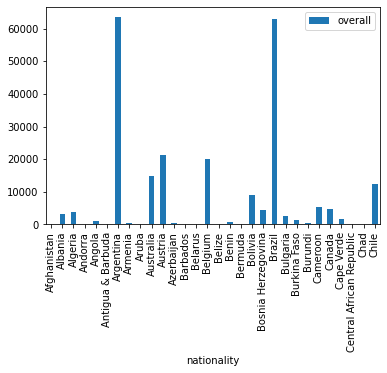

In [28]:
#Veamoslo mejor en un gráfico de barras con algunos paises
puntaje_por_pais.head(30).plot(kind='bar')

In [29]:
#Salario de los jugadores
wage_by_player = fifa21[['short_name', "wage_eur"]].sort_values(by=['wage_eur'],ascending=False)
wage_by_player

,short_name,wage_eur
0,L. Messi,560000
5,K. De Bruyne,370000
15,K. Benzema,350000
25,E. Hazard,350000
24,T. Kroos,310000
...,...,...
5691,B. El Mohamady,0
2034,P. Dárenas,0
2605,M. Degenek,0
2589,K. Olsson,0


Left Preferred 4496
Right Preferred 14448


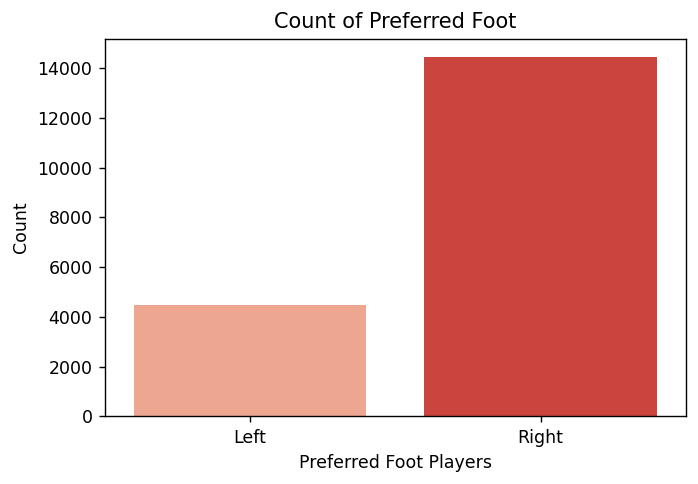

In [30]:
#Para un análisi mas profundo, me interesaba saber que pie es preferido para pegarle a la pelota, lo grafico para verlo con mas claridad
plt.figure(dpi=125)
sns.countplot('preferred_foot',data=fifa21,palette='Reds')
plt.xlabel('Preferred Foot Players')
plt.ylabel('Count')
plt.title('Count of Preferred Foot')
Right,Left=fifa21.preferred_foot.value_counts()
print('Left Preferred',Left)
print('Right Preferred',Right)
plt.show()

Messi vs Ronaldo


In [31]:
#Comparo a Messi con Ronaldo y vemos que según FIFA21 Messi es mejor que Ronaldo
column_r=['short_name','overall','potential','pace','shooting','passing','dribbling','defending','physic', "wage_eur"]
rival = fifa21.head(2)[column_r]
rival= rival.set_index('short_name')
rival.head()


,overall,potential,pace,shooting,passing,dribbling,defending,physic,wage_eur
short_name,,,,,,,,,
L. Messi,93,93,85.0,92.0,91.0,95.0,38.0,65.0,560000
Cristiano Ronaldo,92,92,89.0,93.0,81.0,89.0,35.0,77.0,220000


In [32]:
skills = ['pace',
 'shooting',
 'passing',
 'dribbling',
'defending',
 'physic',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots']

In [33]:
data = fifa21

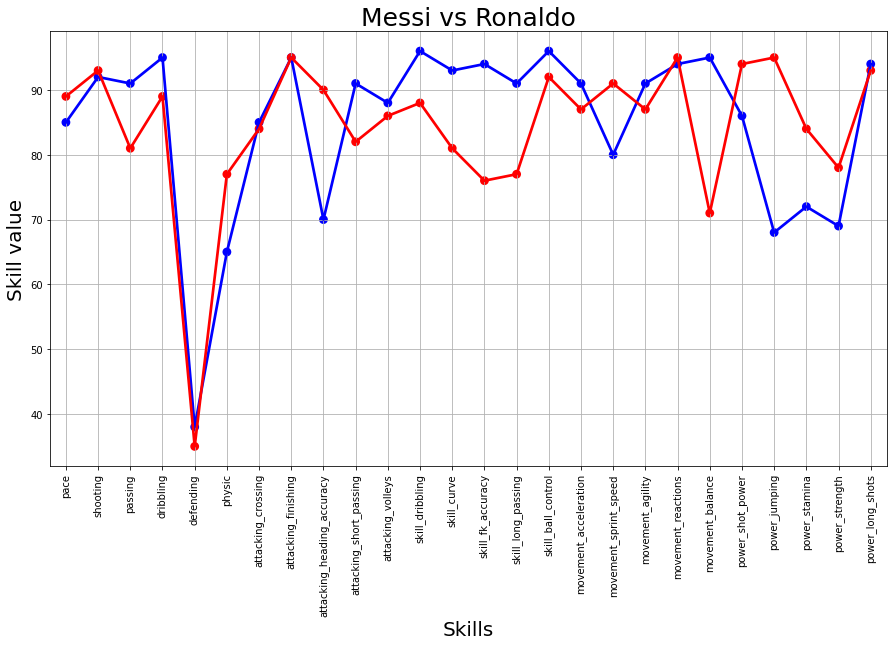

In [34]:
messi = fifa21.loc[fifa21['short_name'] == 'L. Messi']
messi = pd.DataFrame(messi, columns = skills)
ronaldo = fifa21.loc[data['short_name'] == 'Cristiano Ronaldo']
ronaldo = pd.DataFrame(ronaldo, columns = skills)



plt.figure(figsize=(15,8))
sns.pointplot(data=messi,color='blue',alpha=0.6)
sns.pointplot(data=ronaldo, color='red', alpha=0.6)


plt.xticks(rotation=90)
plt.xlabel('Skills', fontsize=20)
plt.ylabel('Skill value', fontsize=20)
plt.title('Messi vs Ronaldo', fontsize = 25)
plt.grid()

Argentina

In [35]:
#Me interesaba ver los jugadores de Argentina, sus edades, cuando nacieron, cuanto miden, donde juegan, su potencial, entre otros datos. Jugadores de Argentina:
Argentina = fifa21[fifa21['nationality'] == 'Argentina']
Argentina

,fifa_id,short_name,long_name,age,born_on,height_cm,weight_kg,nationality,club_name,league_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
13,153079,S. Agüero,Sergio Leonel Agüero del Castillo,32,1988-02-06,173,70,Argentina,Manchester City,English Premier League,...,60+3,58+3,58+3,58+3,60+3,56+3,51+3,51+3,51+3,56+3
22,211110,P. Dybala,Paulo Bruno Exequiel Dybala,26,1993-11-15,177,75,Argentina,Juventus,Italian Serie A,...,68+3,64+3,64+3,64+3,68+3,64+3,54+3,54+3,54+3,64+3
39,183898,A. Di María,Ángel Fabián Di María Hernández,32,1988-02-14,180,69,Argentina,Paris Saint-Germain,French Ligue 1,...,70+3,67+3,67+3,67+3,70+3,66+3,58+3,58+3,58+3,66+3
51,143076,A. Gómez,Alejandro Darío Gómez,32,1988-02-15,167,68,Argentina,Atalanta,Italian Serie A,...,66+3,62+3,62+3,62+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18279,258091,F. Rivasseau,Franco Rivasseau,23,1997-01-07,180,85,Argentina,Patronato,Argentina Primera División,...,18+2,21+2,21+2,21+2,18+2,17+2,20+2,20+2,20+2,17+2
18317,247105,T. Canteros,Tomás Canteros,18,2001-07-16,183,73,Argentina,Club Atlético Lanús,Argentina Primera División,...,19+2,18+2,18+2,18+2,19+2,19+2,20+2,20+2,20+2,19+2
18440,246841,N. Forastiero,Nicolás Alejandro Forastiero,21,1998-07-15,182,81,Argentina,Argentinos Juniors,Argentina Primera División,...,16+2,20+2,20+2,20+2,16+2,16+2,19+2,19+2,19+2,16+2
18462,255453,J. Cruz,Juan Manuel Cruz,20,1999-07-19,184,71,Argentina,Club Atlético Banfield,Argentina Primera División,...,37+2,36+2,36+2,36+2,37+2,37+2,38+2,38+2,38+2,37+2


In [36]:
#Filtramos por los jugadores más altos de Argentina con sus otros datos
Argentina.sort_values(by = ['height_cm'], ascending = False).head()

,fifa_id,short_name,long_name,age,born_on,height_cm,weight_kg,nationality,club_name,league_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
965,205186,P. Gazzaniga,Paulo Dino Gazzaniga,28,1992-02-01,196,90,Argentina,Tottenham Hotspur,English Premier League,...,34+2,37+2,37+2,37+2,34+2,33+2,32+2,32+2,32+2,33+2
742,202811,E. Martínez,Damián Emiliano Martínez,27,1992-02-09,195,90,Argentina,Aston Villa,English Premier League,...,32+2,36+2,36+2,36+2,32+2,32+2,31+2,31+2,31+2,32+2
1047,179847,F. Fazio,Federico Julián Fazio,33,1987-03-17,195,85,Argentina,Roma,Italian Serie A,...,65+3,72+3,72+3,72+3,65+3,67+3,77+0,77+0,77+0,67+3
14712,253216,Adrián,Adrián Rodríguez Giménez,19,2000-12-12,195,83,Argentina,Deportivo Alavés,Spain Primera Division,...,18+2,21+2,21+2,21+2,18+2,18+2,22+2,22+2,22+2,18+2
3430,152993,R. Civelli,Renato Civelli,36,1983-10-14,195,92,Argentina,Club Atlético Huracán,Argentina Primera División,...,60+2,67+2,67+2,67+2,60+2,62+2,72+0,72+0,72+0,62+2


In [37]:
#Los jugadores con más peso de Argentina y sus datos
Argentina.sort_values(by = ['weight_kg'], ascending = False).head()

,fifa_id,short_name,long_name,age,born_on,height_cm,weight_kg,nationality,club_name,league_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
606,176919,N. Guzmán,Nahuel Ignacio Guzmán,34,1986-10-02,193,94,Argentina,Tigres U.A.N.L.,Mexican Liga MX,...,33+3,38+3,38+3,38+3,33+3,32+3,34+3,34+3,34+3,32+3
301,215223,W. Benítez,Walter Daniel Benítez,27,1993-01-19,191,93,Argentina,OGC Nice,French Ligue 1,...,28+2,30+2,30+2,30+2,28+2,28+2,30+2,30+2,30+2,28+2
2004,226378,R. Ábila,Ramón Darío Ábila,30,1989-10-14,177,93,Argentina,Boca Juniors,Argentina Primera División,...,49+2,50+2,50+2,50+2,49+2,47+2,48+2,48+2,48+2,47+2
405,214979,J. Musso,Juan Agustín Musso,26,1994-06-05,191,93,Argentina,Udinese,Italian Serie A,...,27+2,28+2,28+2,28+2,27+2,26+2,27+2,27+2,27+2,26+2
2868,192373,M. Caraglio,Milton Joel Caraglio,31,1988-01-12,187,92,Argentina,Cruz Azul,Mexican Liga MX,...,47+2,48+2,48+2,48+2,47+2,44+2,46+2,46+2,46+2,44+2


In [38]:
# Los jugadores Argentinos con más salarios y el resto de sus datos
Argentina.sort_values(by = ['wage_eur'], ascending = False).head()

,fifa_id,short_name,long_name,age,born_on,height_cm,weight_kg,nationality,club_name,league_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,Spain Primera Division,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
13,153079,S. Agüero,Sergio Leonel Agüero del Castillo,32,1988-02-06,173,70,Argentina,Manchester City,English Premier League,...,60+3,58+3,58+3,58+3,60+3,56+3,51+3,51+3,51+3,56+3
22,211110,P. Dybala,Paulo Bruno Exequiel Dybala,26,1993-11-15,177,75,Argentina,Juventus,Italian Serie A,...,68+3,64+3,64+3,64+3,68+3,64+3,54+3,54+3,54+3,64+3
39,183898,A. Di María,Ángel Fabián Di María Hernández,32,1988-02-14,180,69,Argentina,Paris Saint-Germain,French Ligue 1,...,70+3,67+3,67+3,67+3,70+3,66+3,58+3,58+3,58+3,66+3
80,201399,M. Icardi,Mauro Emanuel Icardi Rivero,27,1993-02-19,181,75,Argentina,Paris Saint-Germain,French Ligue 1,...,54+3,54+3,54+3,54+3,54+3,51+3,51+3,51+3,51+3,51+3


Analizando un poco con las ligas...

In [39]:
columns = fifa21.columns

In [40]:
#cantidad de jugadores que tiene Liverpool

players_L = fifa21['club_name'] == 'Liverpool'
fifa21.loc[players_L,['short_name']].count()

short_name    33
dtype: int64

In [41]:
#Promedio de edad en el Manchester City
players_M = fifa21['club_name'] == 'Manchester City'
fifa21.loc[players_M,['age']].mean()

age    24.636364
dtype: float64

In [42]:
#Puntaje más alto en el Chelsea
players_C = fifa21['club_name'] == 'Chelsea'
fifa21.loc[players_C,['overall']].max()

overall    88
dtype: int64

In [43]:
#Salario más alto  en el FC Barcelona

players_C = fifa21['club_name'] == 'FC Barcelona'
fifa21.loc[players_C,['wage_eur']].max()

wage_eur    560000
dtype: int64

**PREDICTIVE ANALYTICS**

Luego de todo el análisis realizado previamente, explorando profundamente el dataset. Voy a predecir la posición en la que un jugador deberia jugar en base a sus habilidades y características. Para eso, voy a utilizar un modelo de clasificacion, utilizando una regresión logística.  La variable dependiente (la que queremos predecir) es: position Las variables independientes son el resto, pero consideraremos las que creemos que tienen influencia sobre la predicción. Por ejemplo, el club o la nacionalidad no influye en que posicion juega.

In [44]:
fifa21.columns

Index(['fifa_id', 'short_name', 'long_name', 'age', 'born_on', 'height_cm',
       'weight_kg', 'nationality', 'club_name', 'league_name',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

Voy a borrar las columnas que para este modelo no vamos a tener en cuenta. Las variables a continuacion no tienen importancia:


In [45]:
fifa21.drop(['fifa_id','born_on','long_name','long_name',
               'body_type','real_face','nation_position','loaned_from',
               'nation_jersey_number','release_clause_eur','player_tags',
               'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf','rw', 'lam', 'cam'
               , 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb','ldm', 'cdm',
               'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', "nationality", "value_eur", "wage_eur", "team_jersey_number", "contract_valid_until", "joined", "league_rank", "league_name", "club_name", "international_reputation"], inplace=True, axis = 1)

In [46]:
fifa21.columns

Index(['short_name', 'age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'player_positions', 'preferred_foot', 'weak_foot', 'skill_moves',
       'work_rate', 'team_position', 'pace', 'shooting', 'passing',
       'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling',
       'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning',
       'player_traits', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_c

In [47]:
#Me fijo si hay duplicados, si hay los borro
fifa21.duplicated().sum()

0

*Tratamiento de nulos*

In [48]:
#Me fijo cuantos nulos hay
fifa21.isnull().sum()

short_name                        0
age                               0
height_cm                         0
weight_kg                         0
overall                           0
potential                         0
player_positions                  0
preferred_foot                    0
weak_foot                         0
skill_moves                       0
work_rate                         0
team_position                   225
pace                           2083
shooting                       2083
passing                        2083
dribbling                      2083
defending                      2083
physic                         2083
gk_diving                     16861
gk_handling                   16861
gk_kicking                    16861
gk_reflexes                   16861
gk_speed                      16861
gk_positioning                16861
player_traits                 10629
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy  

In [49]:
#Ahora en porcentaje
round(fifa21.isnull().sum().sort_values(ascending=False)/len(data),3) *100

gk_diving                     89.0
gk_handling                   89.0
gk_speed                      89.0
gk_reflexes                   89.0
gk_kicking                    89.0
gk_positioning                89.0
player_traits                 56.1
dribbling                     11.0
physic                        11.0
defending                     11.0
passing                       11.0
shooting                      11.0
pace                          11.0
team_position                  1.2
mentality_interceptions        0.0
power_strength                 0.0
mentality_aggression           0.0
power_long_shots               0.0
mentality_positioning          0.0
power_jumping                  0.0
power_shot_power               0.0
movement_balance               0.0
movement_reactions             0.0
power_stamina                  0.0
short_name                     0.0
movement_sprint_speed          0.0
mentality_vision               0.0
mentality_penalties            0.0
mentality_composure 

Comencemos reemplazando: pace, shooting, passing, dribbling, defending. A todos les faltan exactamente los mismos valores. Sospecho que todos son porteros (GK). Pero lo voy a chequear

In [50]:

fifa21[fifa21['pace'].isnull()]['team_position']

2         GK
7         GK
9         GK
12        GK
16        GK
        ... 
18892    RES
18908    RES
18913    SUB
18924    SUB
18926    SUB
Name: team_position, Length: 2083, dtype: object

Pensé en reemplazar estos valores con 0, pero eso no sería justo a los porteros, después de todo, los porteros pueden correr, disparar y dar buenos pases, por lo que un valor de 0 no es justo. Decidí reemplazar los valores faltantes con el valor mínimo disponible para la columna correspondiente.

In [51]:
#Creo una lista y reemplazo los valores faltantes

missing_values_list = ['pace','shooting','passing','dribbling','defending']
for x in missing_values_list:
        fifa21[x].fillna(fifa21[x].min(), inplace=True)

In [52]:
fifa21[fifa21.physic.isnull()] #filtro las filas con nulos en physic

,short_name,age,height_cm,weight_kg,overall,potential,player_positions,preferred_foot,weak_foot,skill_moves,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
2,J. Oblak,27,188,87,91,93,GK,Right,3,1,...,65,11,68,12,18,87,92,78,90,90
7,M. ter Stegen,28,187,85,90,93,GK,Right,4,1,...,70,25,70,13,10,88,85,88,88,90
9,Alisson,27,191,91,90,91,GK,Right,3,1,...,66,23,65,19,16,86,88,85,91,89
12,T. Courtois,28,199,96,89,90,GK,Left,3,1,...,44,27,66,18,16,84,89,74,85,88
16,M. Neuer,34,193,92,89,89,GK,Right,4,1,...,70,47,70,10,11,87,87,91,86,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18892,J. Arthur,17,175,70,48,66,GK,Right,3,1,...,40,15,37,10,11,49,48,47,47,50
18908,R. Fontalvo,21,185,70,48,59,GK,Left,2,1,...,27,12,27,10,13,46,46,58,44,51
18913,P. McGarvey,16,180,76,48,58,GK,Right,1,1,...,29,17,38,10,13,47,46,46,45,50
18924,Ma Zhen,22,196,85,48,52,GK,Right,2,1,...,43,8,13,16,18,49,47,45,44,46


Para la columna "physic", no quería usar el valor mínimo porque algunos porteros tienen un mejor físico que muchos jugadores de campo.

In [54]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(df[['physic']])
fifa21['physic'] = imputer.transform(fifa21[['physic']])
fifa21.head()


,short_name,age,height_cm,weight_kg,overall,potential,player_positions,preferred_foot,weak_foot,skill_moves,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,33,170,72,93,93,"RW, ST, CF",Left,4,4,...,95,75,96,35,24,6,11,15,14,8
1,Cristiano Ronaldo,35,187,83,92,92,"ST, LW",Right,4,5,...,82,84,95,32,24,7,11,15,14,11
2,J. Oblak,27,188,87,91,93,GK,Right,3,1,...,65,11,68,12,18,87,92,78,90,90
3,R. Lewandowski,31,184,80,91,91,ST,Right,4,4,...,79,88,88,42,19,15,6,12,8,10
4,Neymar Jr,28,175,68,91,91,"LW, CAM",Right,5,5,...,90,92,93,30,29,9,9,15,15,11


In [55]:
fifa21[fifa21.player_traits.isnull()]

,short_name,age,height_cm,weight_kg,overall,potential,player_positions,preferred_foot,weak_foot,skill_moves,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
27,N. Kanté,29,168,70,88,88,"CDM, CM",Right,3,2,...,79,54,85,90,85,15,12,10,7,10
60,Carvajal,28,173,73,86,86,RB,Right,3,3,...,74,45,82,83,85,13,13,15,9,15
71,M. Škriniar,25,188,80,85,89,CB,Right,4,2,...,57,56,81,87,83,10,13,12,8,12
74,Rodri,24,191,82,85,88,"CDM, CM",Right,4,3,...,82,46,85,84,78,10,10,7,14,8
89,P. Gulácsi,30,191,86,85,85,GK,Right,2,1,...,42,24,45,16,20,84,85,82,84,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,K. Angulo,24,176,73,47,52,CM,Right,2,2,...,49,39,36,39,54,10,9,14,6,6
18940,Zhang Mengxuan,21,177,70,47,52,CB,Right,2,2,...,25,35,40,56,47,12,13,8,14,6
18941,Wang Zhenghao,20,185,74,47,51,CB,Right,2,2,...,25,35,40,55,45,12,9,14,15,13
18942,Chen Zitong,23,186,80,47,51,CM,Right,2,2,...,45,42,43,49,45,15,7,7,5,13


In [56]:
#5 jugadores faltan "player_traits". Reemplazaré los valores que faltan con 'No traits available'
fifa21['player_traits'] = fifa21['player_traits'].fillna('No traits available')

In [57]:
round(fifa21.isnull().sum().sort_values(ascending=False)/len(data),3) *100

gk_positioning                89.0
gk_speed                      89.0
gk_reflexes                   89.0
gk_kicking                    89.0
gk_handling                   89.0
gk_diving                     89.0
team_position                  1.2
short_name                     0.0
power_stamina                  0.0
movement_acceleration          0.0
movement_sprint_speed          0.0
movement_agility               0.0
movement_reactions             0.0
movement_balance               0.0
power_shot_power               0.0
power_jumping                  0.0
power_strength                 0.0
skill_long_passing             0.0
power_long_shots               0.0
mentality_aggression           0.0
mentality_interceptions        0.0
mentality_positioning          0.0
mentality_vision               0.0
mentality_penalties            0.0
mentality_composure            0.0
defending_standing_tackle      0.0
defending_sliding_tackle       0.0
goalkeeping_diving             0.0
goalkeeping_handling

In [58]:
missing_data = fifa21.isnull().sum()
print(missing_data[missing_data > 0])

team_position       225
gk_diving         16861
gk_handling       16861
gk_kicking        16861
gk_reflexes       16861
gk_speed          16861
gk_positioning    16861
dtype: int64


Como se puede ver, los jugadores de campo no reciben ninguna calificación de portero. Reemplazaremos los valores faltantes con un valor muy pequeño.

In [59]:
fifa21.fillna(10,inplace=True)

In [60]:
#Chequeo que todo haya quedado con 0 nulos
fifa21.isnull().sum()


short_name                    0
age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
player_positions              0
preferred_foot                0
weak_foot                     0
skill_moves                   0
work_rate                     0
team_position                 0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
player_traits                 0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_cu

Antes de comenzar a analizar las posiciones. En lugar de tener varias posiciones, quiero reducirlas a atacantes y defensores. Para ver que jugadores son mas defensivos y cuales mas ofensivos Luego crearé una nueva columna llamada 'posición' para mostrar estos cambios.

In [61]:
#Así es lo que teniamos en "player positions"
fifa21['player_positions']

0        RW, ST, CF
1            ST, LW
2                GK
3                ST
4           LW, CAM
            ...    
18939            CM
18940            CB
18941            CB
18942            CM
18943            CM
Name: player_positions, Length: 18944, dtype: object

In [62]:
#Cambio las posiciones

positions_list=[]

[positions_list.append(x.split(',')[0]) for x in fifa21['player_positions'].values.tolist()]

fifa21['position']= positions_list


for x in fifa21['position']:
    if x in ['ST','CF','RW','LW', 'LM','RM','CM','CDM','CAM']:
        fifa21['position'].replace(to_replace=x,value='Attacker',inplace=True)

    if x in ['LB','RB','CB', "LWB", "RWB", 'GK']:
        fifa21['position'].replace(to_replace=x,value='Defender',inplace=True)


In [63]:
fifa21['position']

0        Attacker
1        Attacker
2        Defender
3        Attacker
4        Attacker
           ...   
18939    Attacker
18940    Defender
18941    Defender
18942    Attacker
18943    Attacker
Name: position, Length: 18944, dtype: object

In [64]:
#Ya no necesito mas la columna player positions, la borro
fifa21.drop(columns='player_positions', inplace=True)

Cuantos jugadores defensivos y ofensivos tenemos?

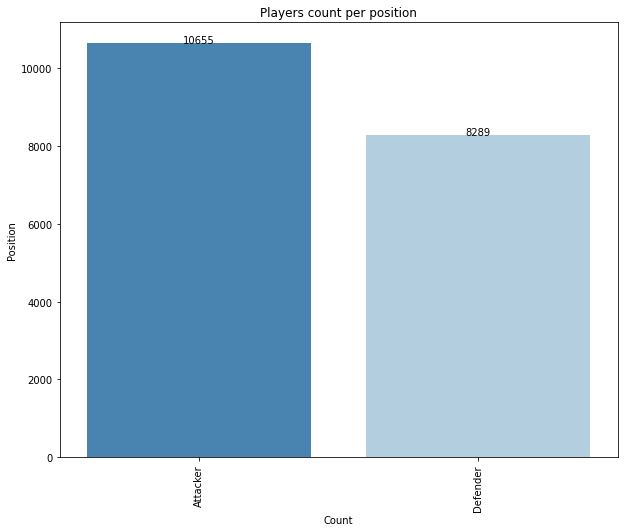

In [65]:
fig, ax1 = plt.subplots(figsize=(10,8))

graph = sns.countplot(ax=ax1, data=fifa21, x='position', order=fifa21['position'].value_counts().head(10).index, palette='Blues_r' )

ax1.set(xlabel='Count',ylabel='Position',title='Players count per position',)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2.,height +0.1,height, ha="center")

plt.show()

*Ploteo, Scalado, encoding, outliers*

*Variables numericas* (a las cuales se le aplica escalado para que todas sean “comparables”, y tengan el “mismo peso” y que sus diferentes magnitudes no afecten de manera incorrecta

In [66]:
fifa21.describe()

,age,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,...,mentality_vision,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,...,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,25.225823,181.190773,75.016892,65.677787,71.086729,2.936603,2.363017,62.976510,48.286318,53.605522,...,53.828231,48.050412,57.978674,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,4.697354,6.825672,7.057140,7.002278,6.109985,0.667132,0.766469,16.899066,17.407441,13.965548,...,13.724072,15.671721,12.118390,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,16.000000,155.000000,50.000000,47.000000,47.000000,1.000000,1.000000,25.000000,16.000000,25.000000,...,9.000000,6.000000,12.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,176.000000,70.000000,61.000000,67.000000,3.000000,2.000000,57.000000,35.000000,47.000000,...,45.000000,38.750000,50.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,25.000000,181.000000,75.000000,66.000000,71.000000,3.000000,2.000000,67.000000,52.000000,56.000000,...,55.000000,49.000000,59.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,29.000000,186.000000,80.000000,70.000000,75.000000,3.000000,3.000000,74.000000,62.000000,63.000000,...,64.000000,60.000000,66.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,53.000000,206.000000,110.000000,93.000000,95.000000,5.000000,5.000000,96.000000,93.000000,93.000000,...,95.000000,92.000000,96.000000,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000


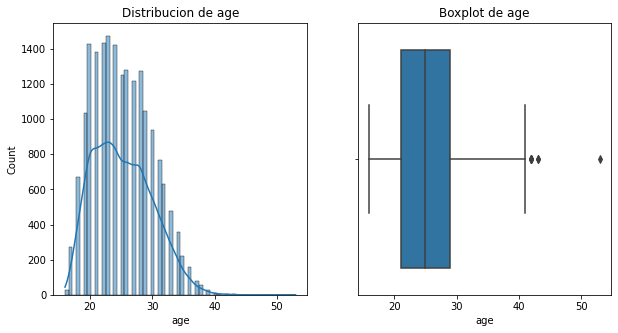

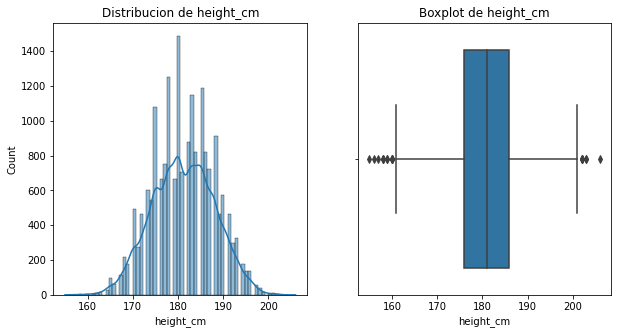

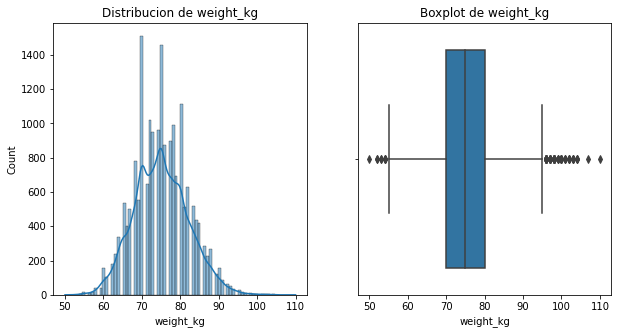

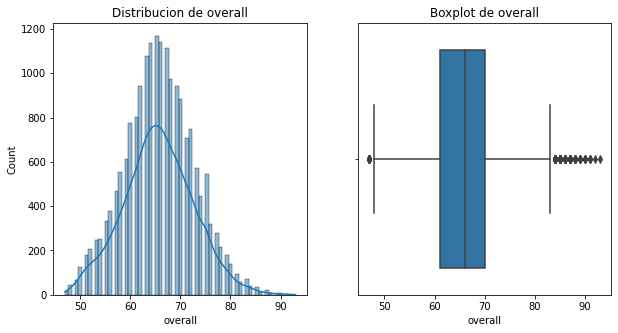

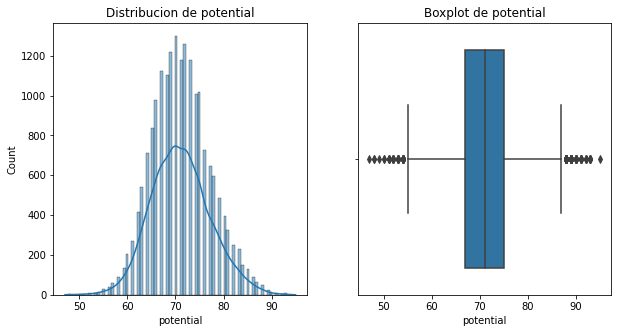

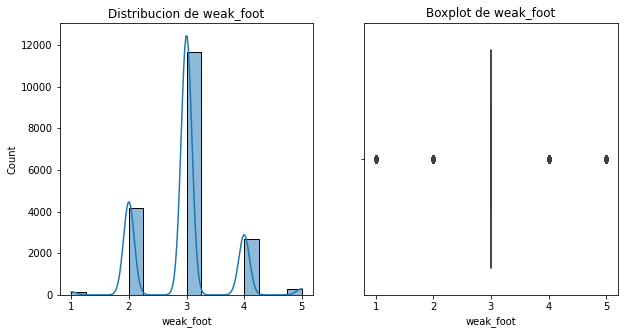

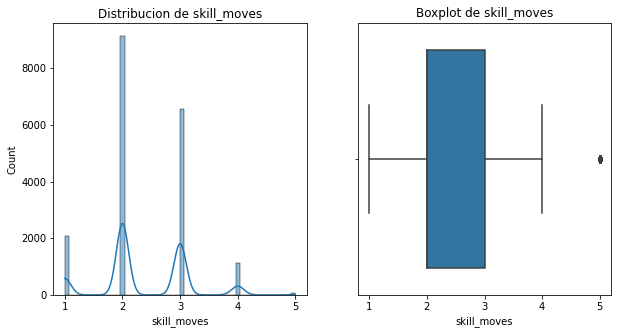

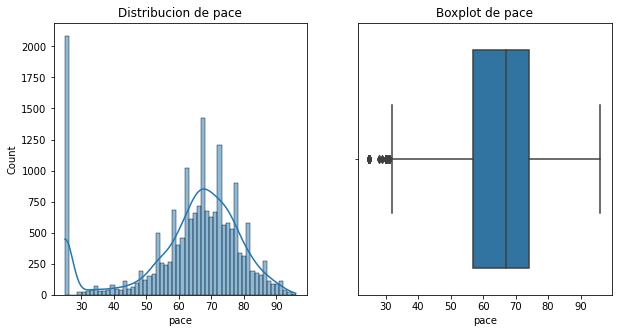

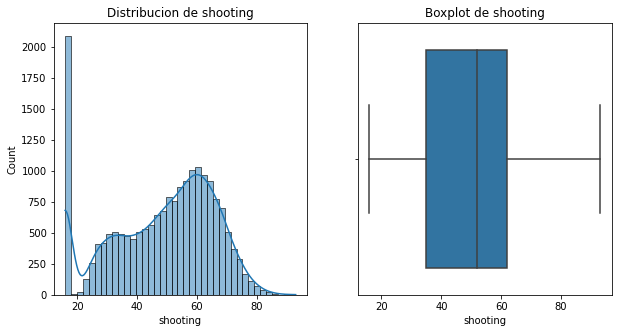

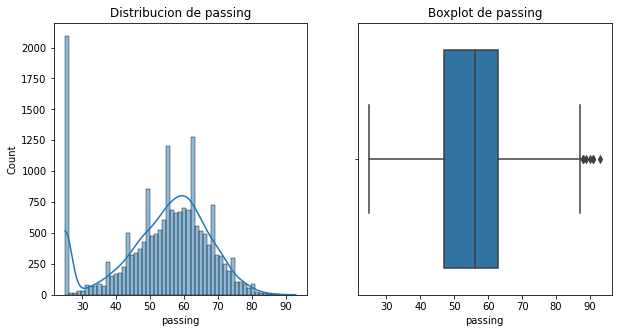

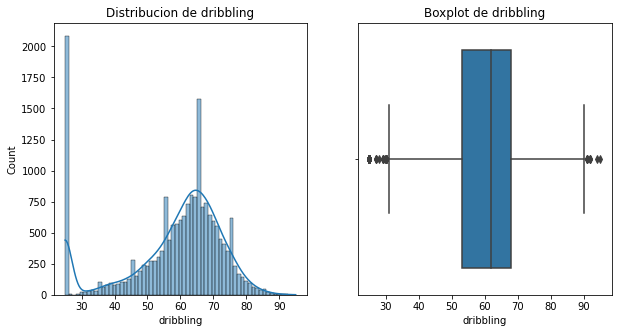

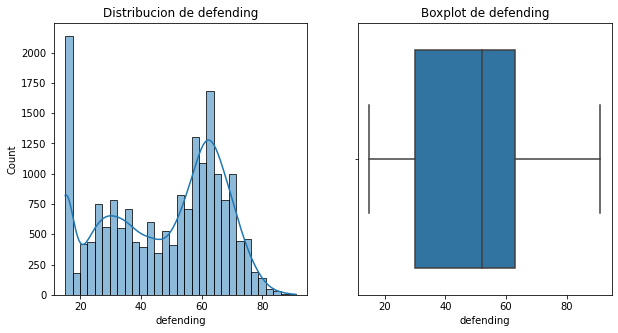

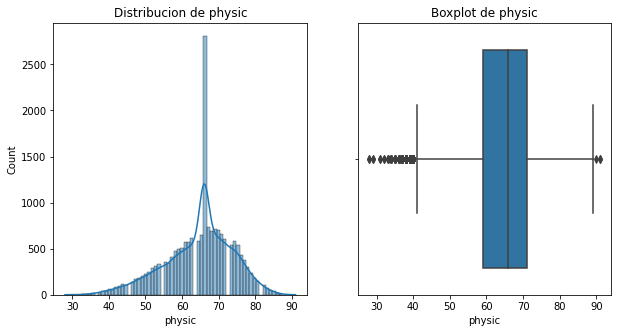

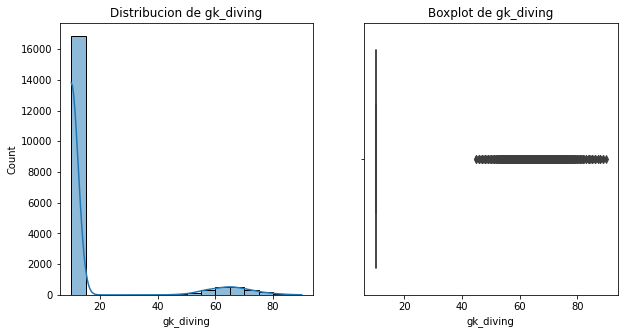

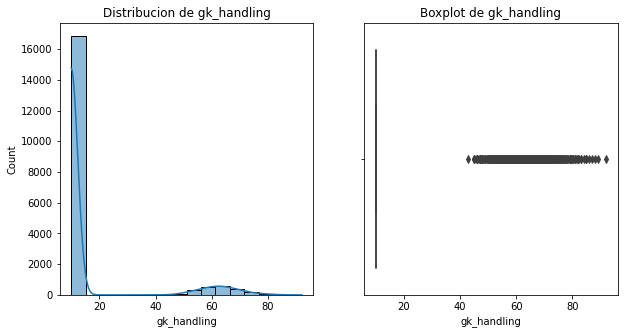

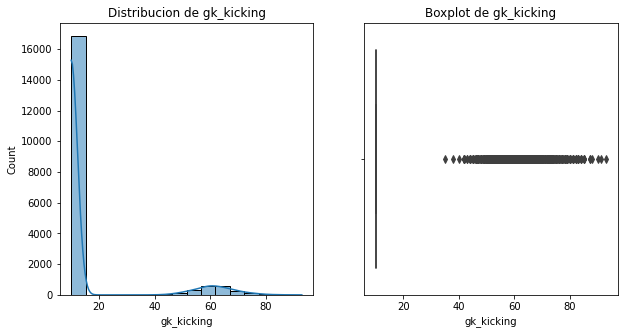

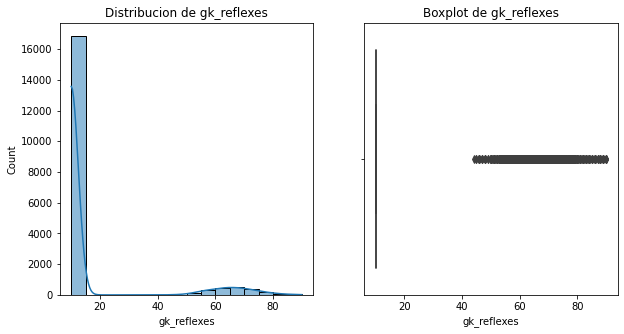

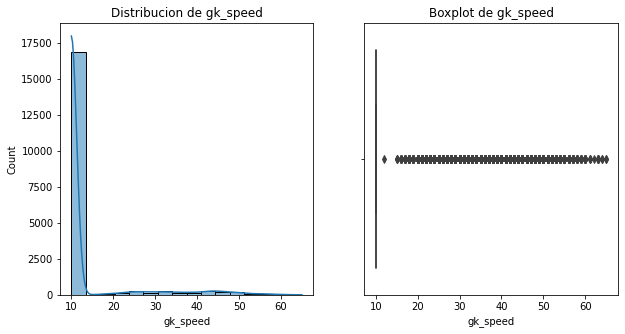

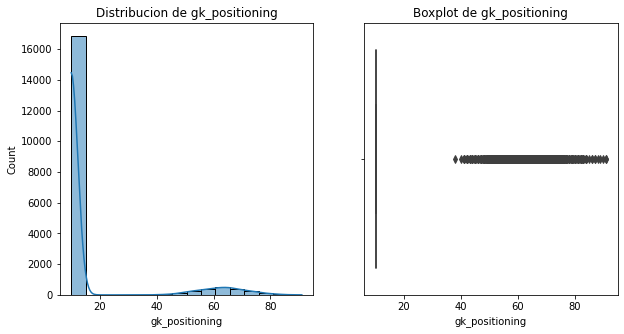

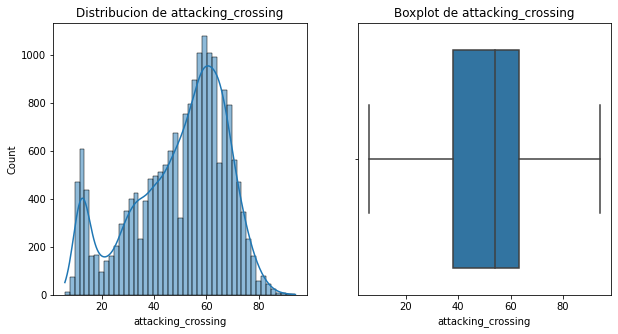

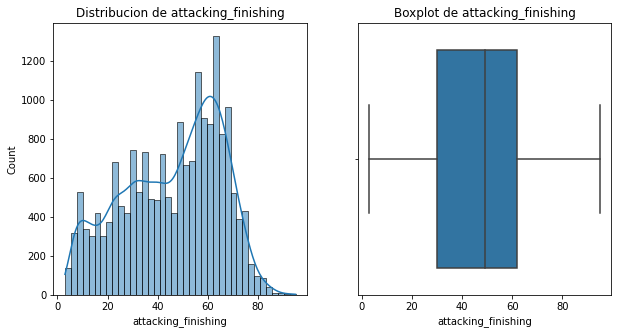

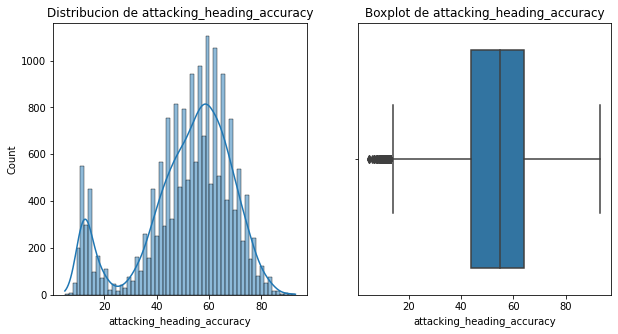

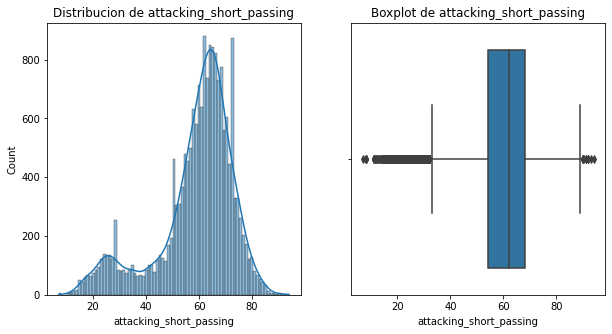

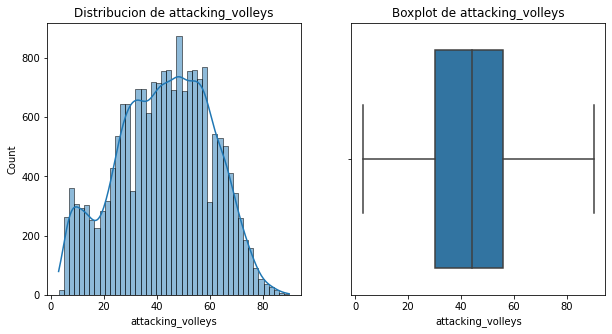

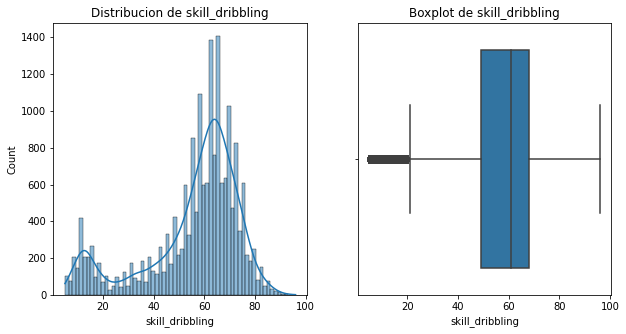

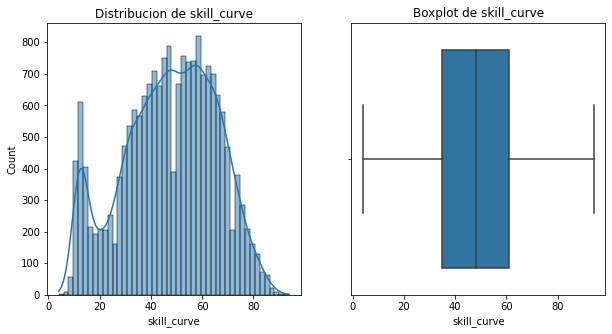

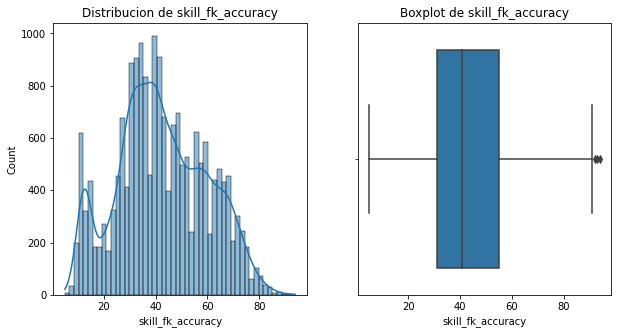

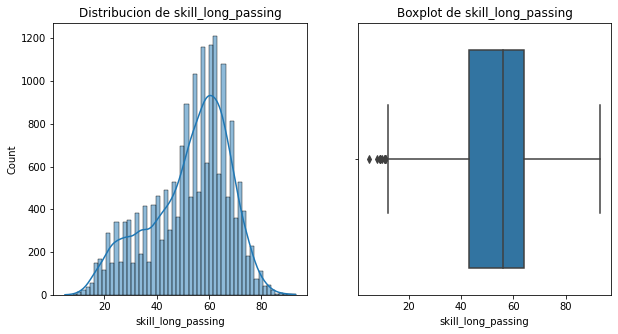

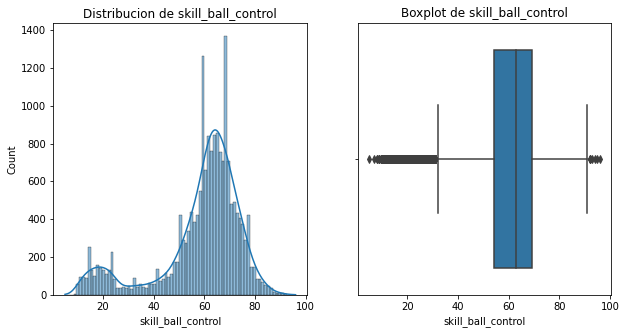

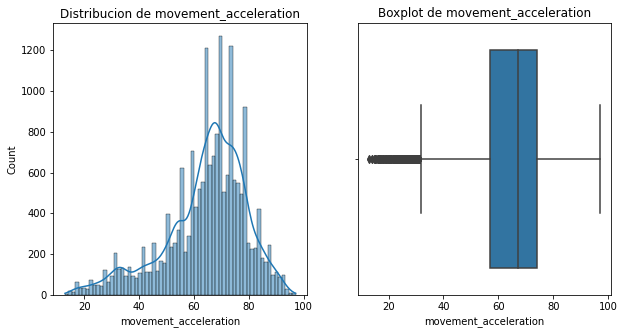

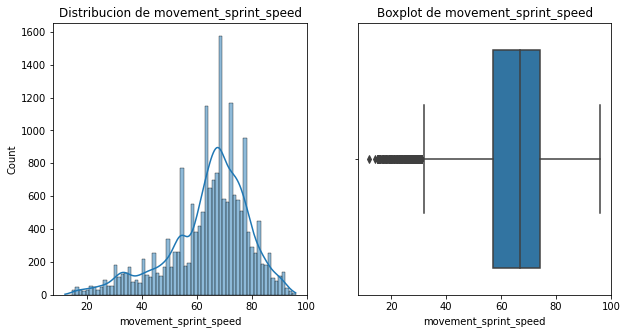

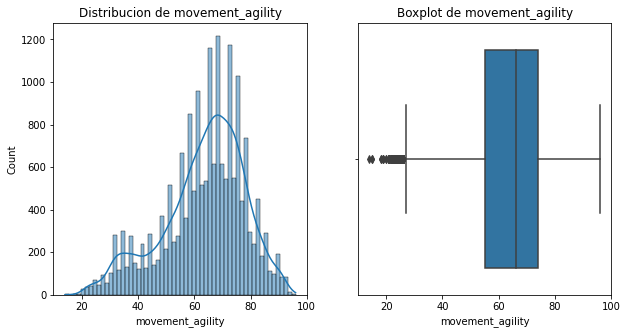

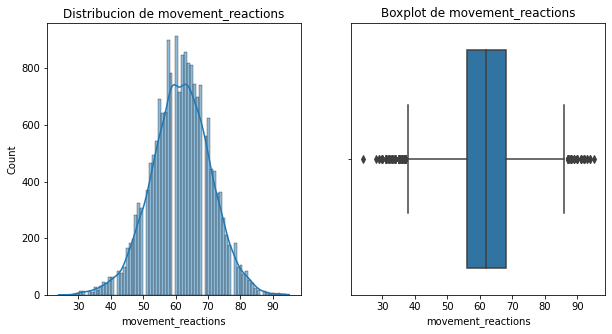

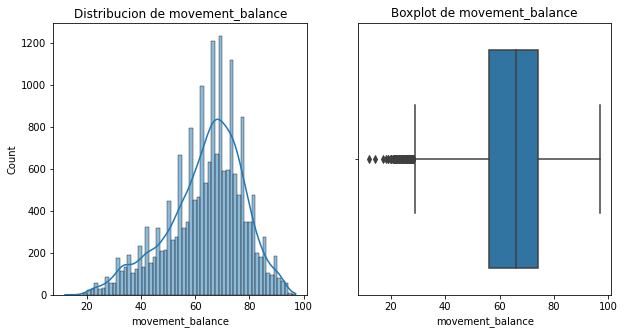

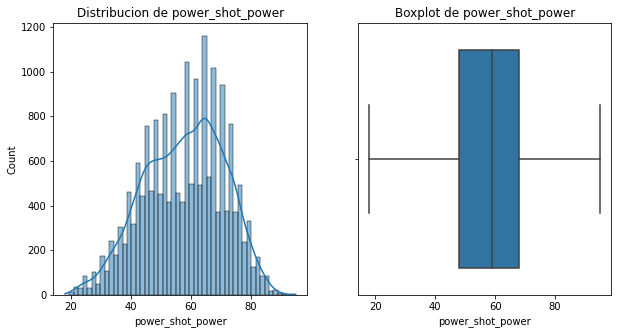

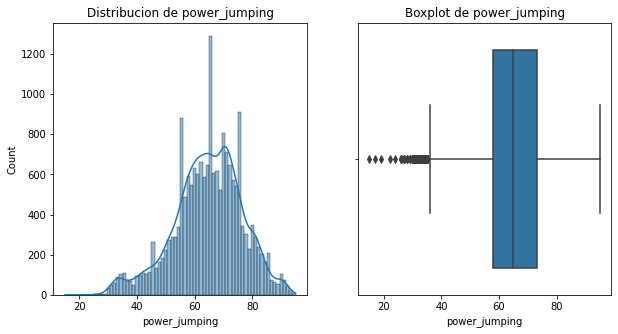

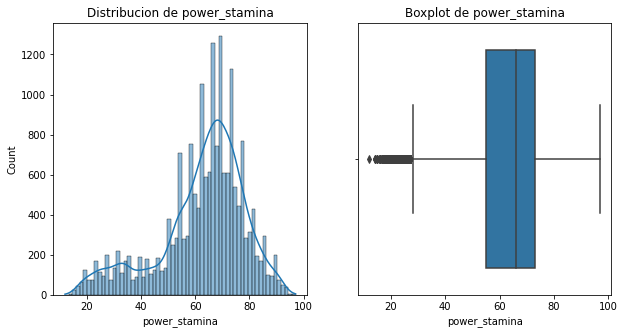

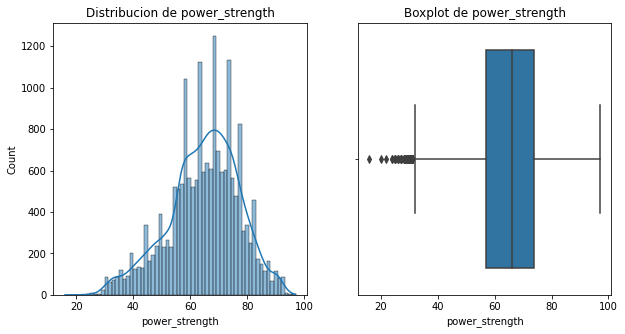

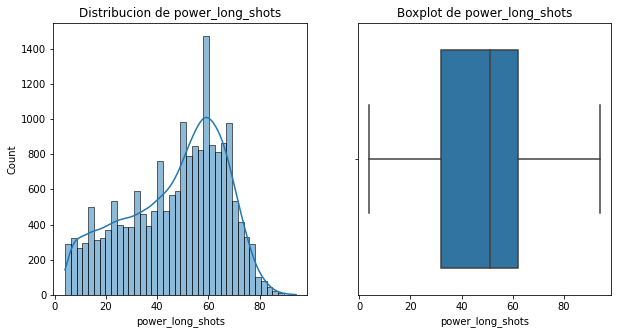

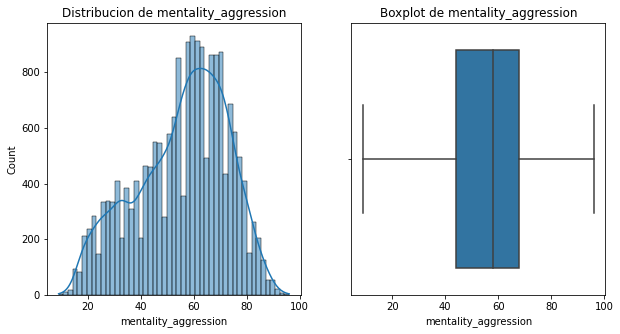

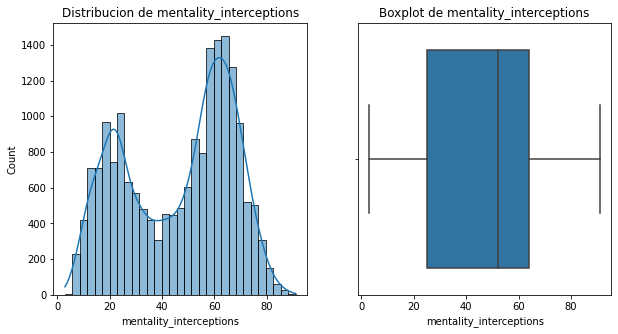

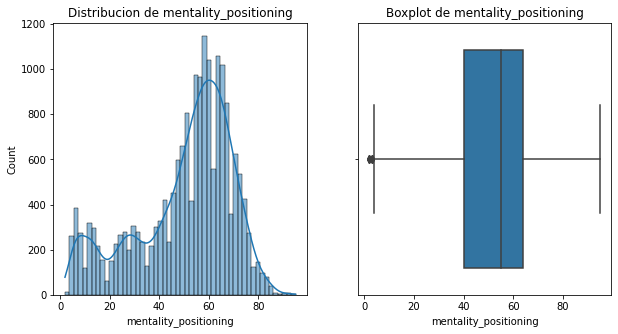

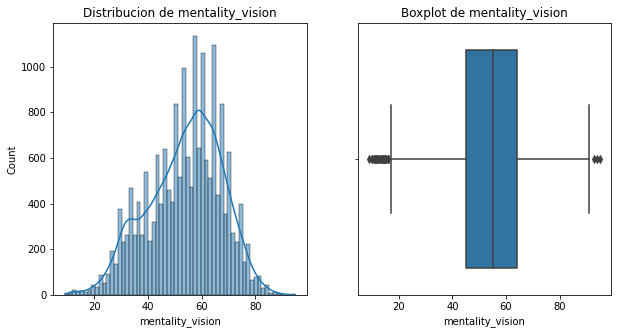

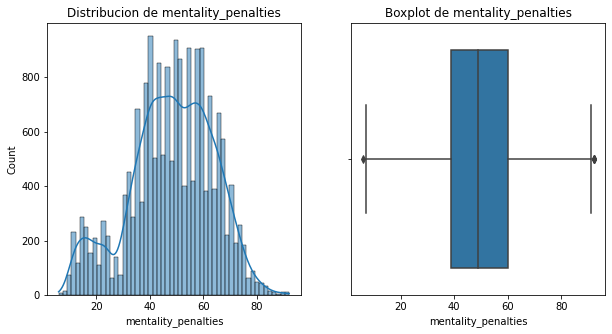

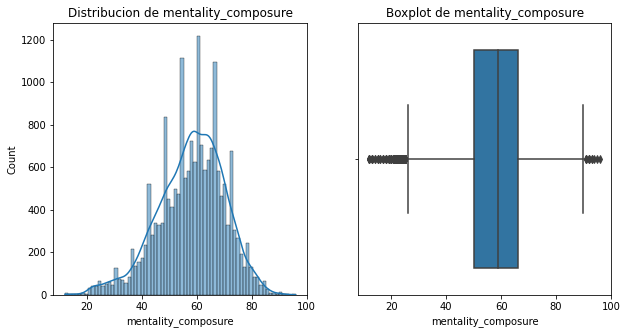

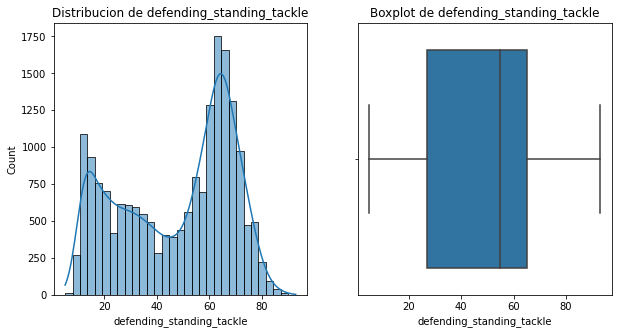

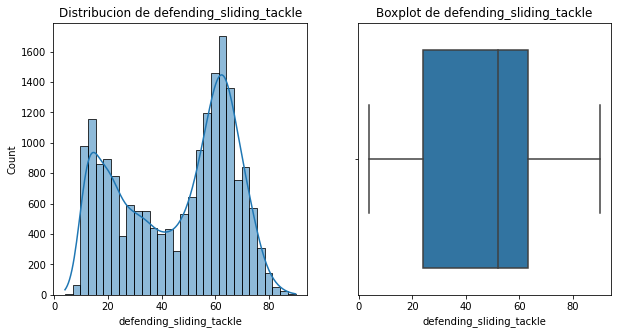

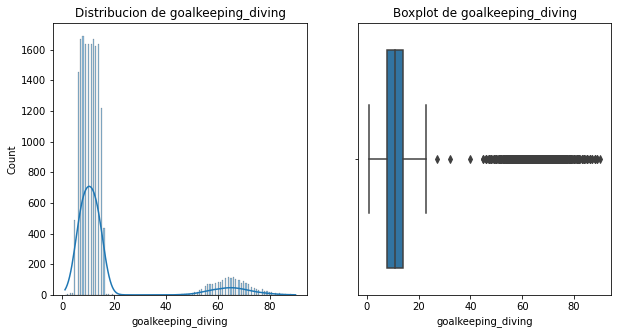

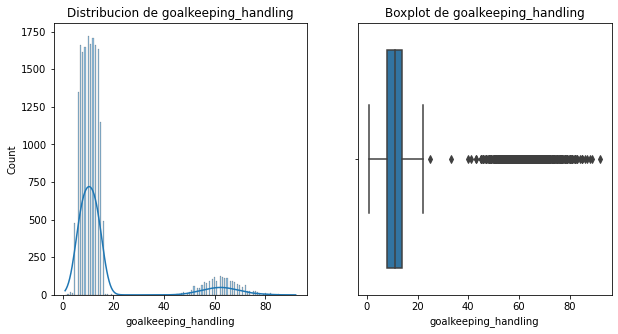

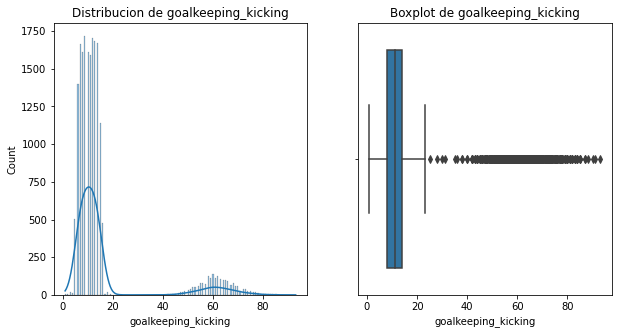

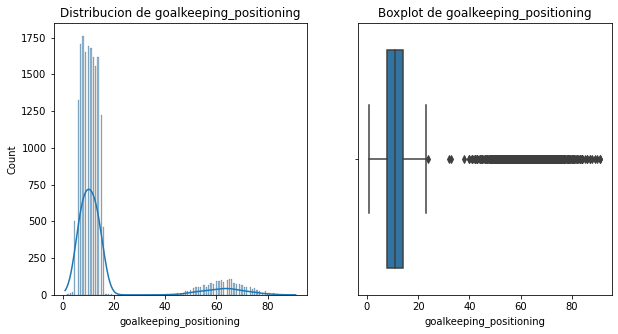

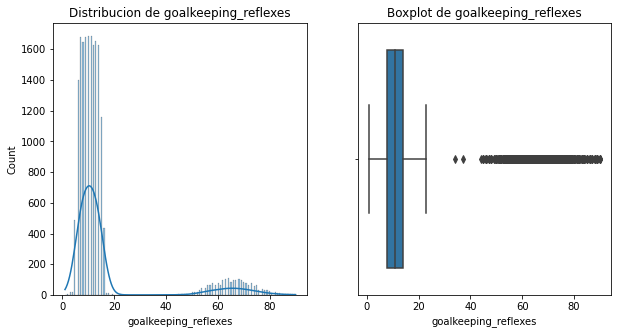

In [67]:

numericas = fifa21.select_dtypes(exclude=['object']).columns


for variable in numericas:
    fig, ax = plt.subplots(1,2,figsize=(10,5))

    ax[0].set_title(f"Distribucion de {variable}")
    sns.histplot(data = fifa21, x = f"{variable}", kde=True, ax = ax[0])

    ax[1].set_title(f"Boxplot de {variable}")
    sns.boxplot(data = fifa21, x = f"{variable}", ax=ax[1])

Empezando por los outliers, en la mayoría de los casos, no considero que haya que borrar outliers ya que siguen una direccionaldiad o camino, una tendencia. Las unicas variables que  se desprende en demasiado de la tendencia, del resto de los datos y considero que habria que eliminarlas son: age, weak foot, skills moves

In [68]:
fifa21.age.value_counts().sort_values(ascending = False)

23    1473
22    1435
20    1427
24    1423
21    1383
26    1277
28    1274
25    1250
27    1217
29    1045
19    1032
30     935
31     768
18     668
32     628
33     476
34     359
17     273
35     218
36     160
37      81
38      57
16      29
39      28
40      13
41       7
42       5
43       2
53       1
Name: age, dtype: int64

In [69]:
#Veo los valores y sus filas que superan cierto rango
fifa21[fifa21.age> 38]

,short_name,age,height_cm,weight_kg,overall,potential,preferred_foot,weak_foot,skill_moves,work_rate,...,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,position
239,G. Buffon,42,192,92,82,82,Right,2,1,Medium/Medium,...,22,70,11,11,77,76,74,91,78,Defender
1026,Hilton,42,180,78,77,77,Right,4,3,Medium/Medium,...,64,77,80,77,12,7,11,12,13,Defender
1496,A. Zamorado,39,182,78,76,76,Left,3,3,Medium/Low,...,86,70,26,15,6,11,8,6,10,Attacker
1781,J. Sand,39,182,79,75,75,Right,4,3,High/Low,...,85,85,21,25,11,16,15,9,14,Attacker
1785,J. Corona,39,184,84,75,75,Right,3,1,Medium/Medium,...,21,63,13,11,72,77,68,78,73,Defender
2257,M. Rodríguez,39,173,74,74,74,Right,4,4,Medium/Low,...,77,86,30,26,15,11,15,9,9,Attacker
2277,Cássio,39,186,79,74,74,Right,2,1,Medium/Medium,...,24,59,17,14,76,74,68,69,75,Defender
2742,N. Penneteau,39,185,78,73,73,Left,3,1,Medium/Medium,...,15,56,11,11,70,76,66,81,66,Defender
2743,Ricardo Costa,39,183,80,73,73,Right,3,2,Medium/High,...,40,75,74,73,14,15,7,8,13,Defender
2747,A. Boruc,40,193,88,73,73,Right,3,1,Medium/Medium,...,21,63,20,20,73,72,66,75,71,Defender


Este outliers, se desprende en demasiado de la tendencia. Por lo tanto, considero que debe ser eliminado

In [70]:
fifa21 =  fifa21[fifa21.age <38]
fifa21.head()

,short_name,age,height_cm,weight_kg,overall,potential,preferred_foot,weak_foot,skill_moves,work_rate,...,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,position
0,L. Messi,33,170,72,93,93,Left,4,4,Medium/Low,...,75,96,35,24,6,11,15,14,8,Attacker
1,Cristiano Ronaldo,35,187,83,92,92,Right,4,5,High/Low,...,84,95,32,24,7,11,15,14,11,Attacker
2,J. Oblak,27,188,87,91,93,Right,3,1,Medium/Medium,...,11,68,12,18,87,92,78,90,90,Defender
3,R. Lewandowski,31,184,80,91,91,Right,4,4,High/Medium,...,88,88,42,19,15,6,12,8,10,Attacker
4,Neymar Jr,28,175,68,91,91,Right,5,5,High/Medium,...,92,93,30,29,9,9,15,15,11,Attacker


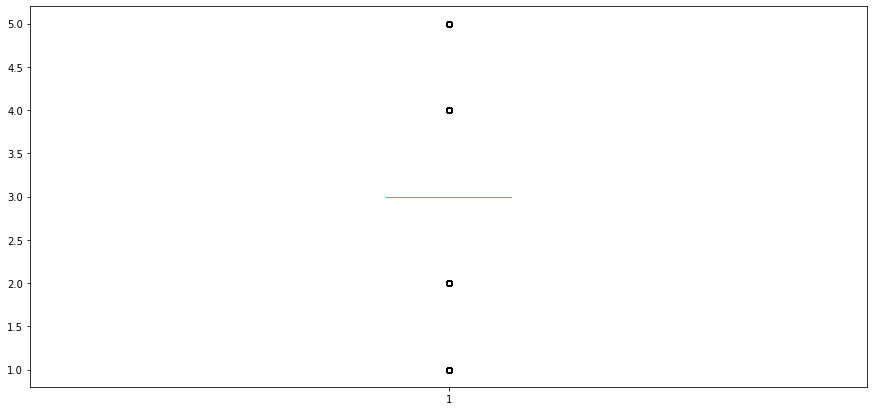

In [71]:
fig = plt.figure(figsize =(15, 7))
plt.boxplot(fifa21.weak_foot)
plt.show()

In [72]:
fifa21.weak_foot.value_counts().sort_values(ascending = False)

3    11598
2     4146
4     2682
5      273
1      132
Name: weak_foot, dtype: int64

In [73]:
fifa21.skill_moves.value_counts().sort_values(ascending = False)

2    9107
3    6511
1    2037
4    1122
5      54
Name: skill_moves, dtype: int64

Voy a seleccionar algunas variables para predecir la posicion del jugador  y les realizo el escalado a estas para no usar las 56 columnas. Para seleccionarlas voy a tener en cuenta variables que definan si son atacantes o defensivos.

In [74]:
fifa_model = fifa21[["position", "attacking_finishing", "defending_sliding_tackle", "skill_dribbling", "gk_reflexes"]].copy()
print(fifa_model)

       position  attacking_finishing  defending_sliding_tackle  \
0      Attacker                   95                        24   
1      Attacker                   95                        24   
2      Defender                   11                        18   
3      Attacker                   94                        19   
4      Attacker                   87                        29   
...         ...                  ...                       ...   
18939  Attacker                   37                        54   
18940  Defender                   16                        47   
18941  Defender                   20                        45   
18942  Attacker                   32                        45   
18943  Attacker                   32                        45   

       skill_dribbling  gk_reflexes  
0                   96         10.0  
1                   88         10.0  
2                   12         90.0  
3                   85         10.0  
4                

<AxesSubplot:>

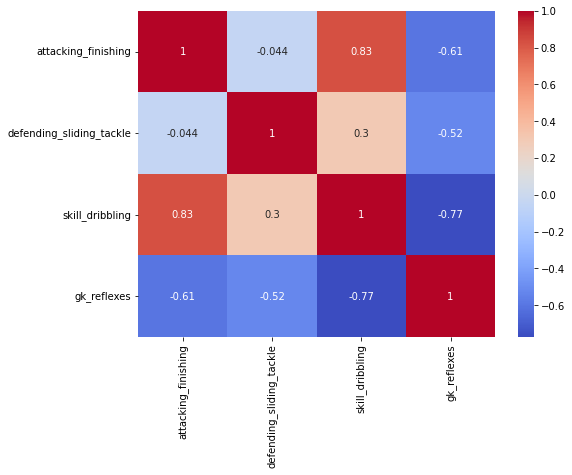

In [75]:
#Se elabora una matriz de correlación. Heatmap
rcParams['figure.figsize'] = 8,6
sns.heatmap(fifa_model.corr(),cmap='coolwarm',annot=True)

Variables numericas seleccionadas de nuestro modelo

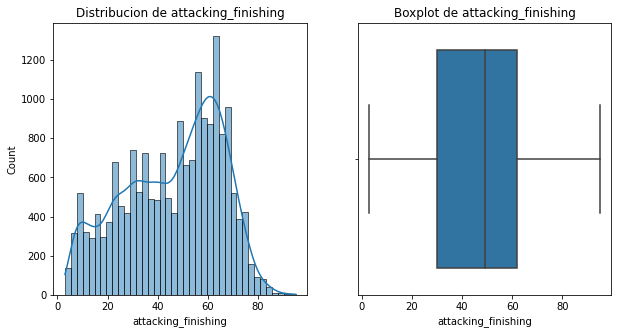

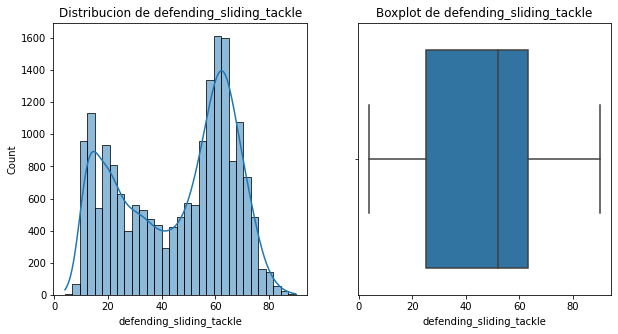

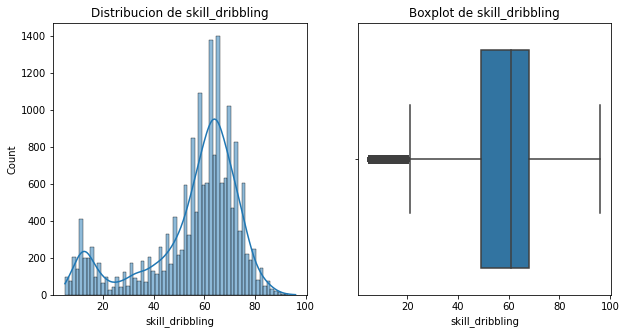

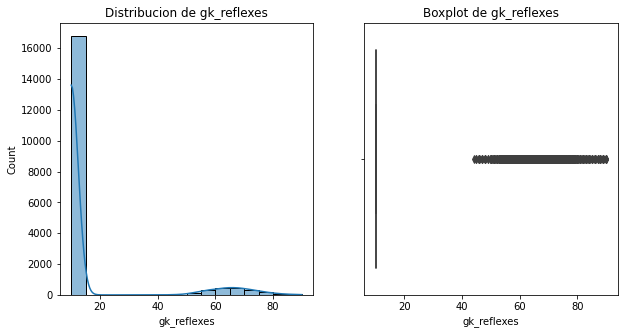

In [76]:
numericas = fifa_model.select_dtypes(exclude=['object']).columns


for variable in numericas:
    fig, ax = plt.subplots(1,2,figsize=(10,5))

    ax[0].set_title(f"Distribucion de {variable}")
    sns.histplot(data = fifa_model, x = f"{variable}", kde=True, ax = ax[0])

    ax[1].set_title(f"Boxplot de {variable}")
    sns.boxplot(data = fifa_model, x = f"{variable}", ax=ax[1])

Attacking_finishing
Esta distribución podríamos decir que tiende a una normal, y sin outliers. Por lo tanto, aplicamos un escalado standard

In [77]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
fifa_model['attacking_finishing'] = std_scaler.fit_transform(fifa_model[['attacking_finishing']])
fifa_model.head()

,position,attacking_finishing,defending_sliding_tackle,skill_dribbling,gk_reflexes
0,Attacker,2.515243,24,96,10.0
1,Attacker,2.515243,24,88,10.0
2,Defender,-1.782466,18,12,90.0
3,Attacker,2.464080,19,85,10.0
4,Attacker,2.105938,29,95,10.0


defending_sliding_tackle
Esta distribución podríamos decir que tiende a una normal, y sin outliers. Por lo tanto, aplicamos un escalado standard

In [78]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
fifa_model['defending_sliding_tackle'] = std_scaler.fit_transform(fifa_model[['defending_sliding_tackle']])
fifa_model.head()

,position,attacking_finishing,defending_sliding_tackle,skill_dribbling,gk_reflexes
0,Attacker,2.515243,-1.033601,96,10.0
1,Attacker,2.515243,-1.033601,88,10.0
2,Defender,-1.782466,-1.320372,12,90.0
3,Attacker,2.464080,-1.272577,85,10.0
4,Attacker,2.105938,-0.794625,95,10.0


skill_dribbling
Al contar con varios outliers, y la distribución parecerse muy poco a una normal, aplicamos un escalado robusto

In [79]:
from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()
fifa_model['skill_dribbling'] = rb_scaler.fit_transform(fifa_model[['skill_dribbling']])
fifa_model.head()

,position,attacking_finishing,defending_sliding_tackle,skill_dribbling,gk_reflexes
0,Attacker,2.515243,-1.033601,1.842105,10.0
1,Attacker,2.515243,-1.033601,1.421053,10.0
2,Defender,-1.782466,-1.320372,-2.578947,90.0
3,Attacker,2.464080,-1.272577,1.263158,10.0
4,Attacker,2.105938,-0.794625,1.789474,10.0


gk_reflex
En este caso, como la distribucion no se parece a una normal, y cuenta con outliers. Se hará un escalado de max-min

In [80]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

fifa_model['gk_reflexes']= minmaxscaler.fit_transform(fifa_model[['gk_reflexes']])

fifa_model

,position,attacking_finishing,defending_sliding_tackle,skill_dribbling,gk_reflexes
0,Attacker,2.515243,-1.033601,1.842105,0.0
1,Attacker,2.515243,-1.033601,1.421053,0.0
2,Defender,-1.782466,-1.320372,-2.578947,1.0
3,Attacker,2.464080,-1.272577,1.263158,0.0
4,Attacker,2.105938,-0.794625,1.789474,0.0
...,...,...,...,...,...
18939,Attacker,-0.452223,0.400255,-0.894737,0.0
18940,Defender,-1.526650,0.065689,-2.210526,0.0
18941,Defender,-1.321998,-0.029902,-1.368421,0.0
18942,Attacker,-0.708039,-0.029902,-0.842105,0.0


*Variables categoricas* voy a convertir variables categoricas a númericas, aplicando alguna de las tecnicas que vimos

In [81]:
categoricas = fifa_model.select_dtypes(exclude=['float', 'integer']).columns
categoricas

Index(['position'], dtype='object')

Position
Encoding de la variable target. La variable a predecri es multicategorica es por eso que lo hacemos de esta forma.
Atacantes fue convertido a 0
Defensores fue convertido a 1



In [82]:
from sklearn.preprocessing import LabelEncoder

fifa_model['position'] = LabelEncoder().fit_transform(fifa_model['position'])
fifa_model.head()

,position,attacking_finishing,defending_sliding_tackle,skill_dribbling,gk_reflexes
0,0,2.515243,-1.033601,1.842105,0.0
1,0,2.515243,-1.033601,1.421053,0.0
2,1,-1.782466,-1.320372,-2.578947,1.0
3,0,2.464080,-1.272577,1.263158,0.0
4,0,2.105938,-0.794625,1.789474,0.0


**Modelo base**

Como se dijo antes, se aplicara como modelo una regresión logística (clasificación) al tratarse de una predicción de una variable categórica.
La variable dependiente (la que queremos predecir) es: position
Las variables independientes son el resto, pero consideraremos las que creemos que tienen influencia sobre la predicción

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Dividimos entre las variables independientes, y la dependiente (que quiero predecir, siendo position)

In [84]:
X = fifa_model.drop(columns=['position'])
y = fifa_model['position']

Ahora vamos a separar la data entre la de entrenamiento y la de testeo/prueba. La de entrenamiento se usará para, perdón por la redundancia, entrenar al modelo y la otra para hacer la prueba de predicción, para que el modelo no “tenga encima” ya las respuestas correctas y pruebe con cosas desconocidas para si

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [86]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy on test set: ', model.score(X_test, y_test))

Accuracy on test set:  0.8893805309734514


Ahora lo que hacemos es probando estratificar la variable target, dependiente. Porque queremos que esta siempre tenga la misma proporción en todas las pruebas que se hagan

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=10)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy on test set: ', model.score(X_test, y_test))

Accuracy on test set:  0.8927433628318584


Matriz de confusión

In [88]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)

print(confusion)
print('True Positive: ', confusion[0][0], 'False Negative: ', confusion[0][1])
print('False Positive: ', confusion[1][0], 'True Negative: ', confusion[1][1])
TP = confusion[0,0] # true positive
TN = confusion[1,1] # true negatives
FP = confusion[1,0] # false positives
FN = confusion[0,1] # false negatives
print((TP + TN)/(TP+TN+FP+FN))

[[2827  356]
 [ 250 2217]]
True Positive:  2827 False Negative:  356
False Positive:  250 True Negative:  2217
0.8927433628318584


Los números que se encuentran en la diagonal (de izquierda a derecha) son aquellos que nos dieron, Y la proporción de estos sobre el total es el accuracy.
2827 de los casos fueron predichos como exitosos y efectivamente lo eran
2217 de lso casos fueron predichos como no exitosos y efectivamente no lo eran.
Por el otro lado, los otros numero, los false… son los que fueron predichos de manera incorrecta
250 fueron predichos como exitosos, pero habían sido no exitosos
356 fueron predichos como no exitosos y habían sido exitosos

Métricas

In [89]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      3183
           1       0.86      0.90      0.88      2467

    accuracy                           0.89      5650
   macro avg       0.89      0.89      0.89      5650
weighted avg       0.89      0.89      0.89      5650



Precisión

In [90]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred, average='macro'))
print(precision_score(y_test, y_pred))

0.8901960700108031
0.8616401088223863


Decidí mirar precisión, ya que con esta podemos ver de alaguna manera cuan útiles son lso resultados, viendo la calidad de estos. Ya que, no queremos usar mal jugadores que se sabian desde el inicio que no era su posicion. Nos dio un número bastante cercano a 1, lo que indica que es un buen modelo. Alcanzar estos números en la vida real es bastante complicado

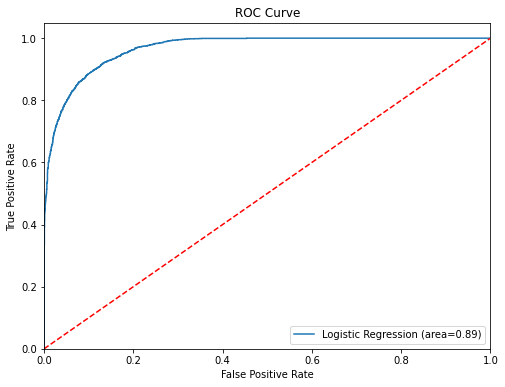

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.savefig('ROC-Curve')
plt.show()


La curva ROC es una herramienta común utilizada con clasificadores binarios. La línea de puntos representa un clasificador puramente aleatorio; un buen clasificador permanece lo más lejos posible de esa línea (hacia la esquina superior izquierda).

In [92]:
# before scaling
y = fifa_model['position']
X = fifa_model.drop('position',axis=1)

y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
reg = LogisticRegression()
reg.fit(X_train, y_train)
yPred = reg.predict(X_test)

print('Score = ',reg.score(X,y))

Score =  0.891083851096596


In [93]:
#after scalling
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # aplicar escalado en datos de entrenamiento



print('Score = ',pipe.score(X_test, y_test))  # aplique escalado en los datos de prueba, sin filtrar los datos de entrenamiento.

Score =  0.96


En conclusión, por lo que se ve el modelo fue bueno ya que cuanto mas cercano al 1 o al 100% el score, mejor. COmo se explico anteriormente, me parece muy util el modelo creado ya que ayuda especialmente a un entrenador a saber que  jugadores son atacantes y que jugadores son mas defensivos para luego formar el equipo. Aprendí mucho mientras hacía este notebook. Sé que hay muchas preguntas que podrían haber sido respondidas con este conjunto de datos pero opté por analizar lo que se vio anteriormente. Por otro lado,  hay jugadores jóvenes que oscilan entre los 20 y los 23 años en estos datos.   . Solo unos pocos ganan mucho, tienen un valor alto y salarios altos. Hay más jugadores diestros, pero los zurdos tienen ventaja en los movimientos de habilidad. Los diestros con un nivel general más bajo también muestran buenas habilidades.Ningún jugador tiene todas las cualidades aunque algunos se acercan.